In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [44]:
df = pd.read_csv('/Users/pein/Desktop/train.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [46]:
df = df.drop(['Ticket','Cabin'],axis=1)

In [47]:
df = df.dropna()

Look at the data graphically

In [48]:
#special the parameters in the graphs
fig = plt.figure(figsize=(18,6),dpi=1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# let's plot different plot together
ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax1.set_xlim(-1,2)
plt.title('Distribution of Survived,(1=Survived)')

ax2 = plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age,alpha=alpha_scatterplot)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('Survived by Age')

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='barh',alpha=alpha_bar_chart)
ax3.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title('Class Distribution')

ax4 = plt.subplot2grid((2,3),(1,0),colspan=2)
df.Age[df.Pclass==1].plot(kind='kde')
df.Age[df.Pclass==2].plot(kind='kde')
df.Age[df.Pclass==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age distribution within Classes')
plt.legend(('1st Class','2nd Class','3rd Class'),loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title('Passenger per borading location')
plt.show()

Exploratory Visualization

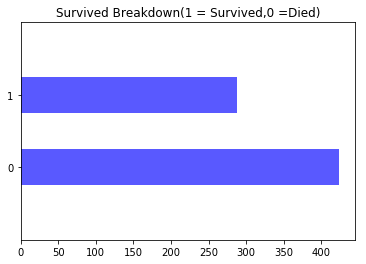

In [49]:
plt.figure(figsize=(6,4))
fig,ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color='blue',
                               alpha=0.65)
ax.set_ylim(-1,len(df.Survived.value_counts()))
plt.title("Survived Breakdown(1 = Survived,0 =Died)")

Let tease more structure out of the data

Let break the previous graph  down by gender


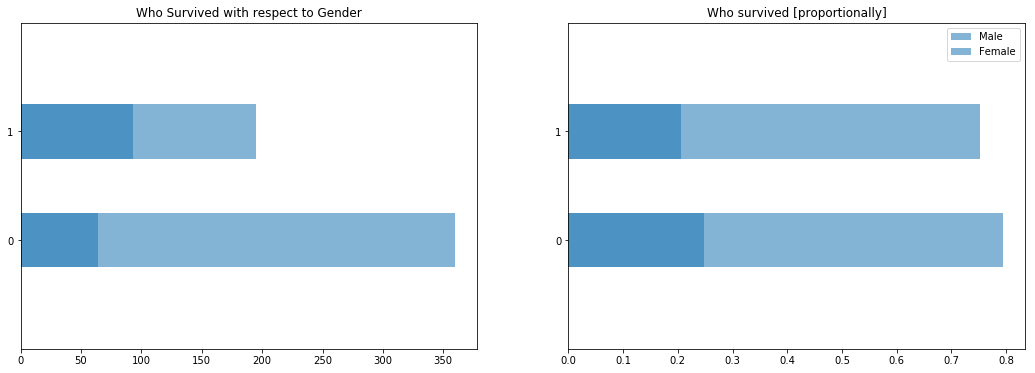

In [50]:
fig = plt.figure(figsize=(18,6))
# create a plot of two subsets,male and female,of he survived variable
# after we do that we call value_counts() so it can be easily plot
# barh is just a horizontal bar graph
df_male = df.Survived[df.Sex=='male'].value_counts().sort_index()
df_female = df.Survived[df.Sex=='female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male',alpha=0.55)
df_female.plot(kind='barh',label='Female',alpha=0.55)
ax1.set_ylim(-1,2)
plt.title('Who Survived with respect to Gender')

# adjust graph to display the proportions of survived by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male',alpha=0.55)
(df_female/float(df_female.sum())).plot(kind='barh',label='Female',alpha=0.55)
plt.title('Who survived [proportionally]')
ax2.set_ylim(-1,2)
plt.legend(loc='best')

here is a clear that man die and survived more that woman.It is obvious that woman has a high survived ration

Great!Let's break down the class to gender to see the more information

In [51]:
fig = plt.figure(figsize=(18,4),dpi=1600)
alpha_level = 0.65
# building on the previous code,here we can create an additional within gender subset

ax1 = fig.add_subplot(141)

female_highclass = df.Survived[df.Sex=='female'][df.Pclass!=3].value_counts()
female_highclass.plot(kind='bar',label='female,higclass',alpha=alpha_level)
ax1.set_xticklabels(['Survived','Died'],rotation=0)
ax1.set_xlim(-1,len(female_highclass))
plt.legend(loc='best')

ax2 = fig.add_subplot(142,sharey=ax1)
female_lowclass = df.Survived[df.Sex=='female'][df.Pclass==3].value_counts()
female_lowclass.plot(kind='bar',label='female,lowerclass',alpha=alpha_level)
# this is really strange that this is from 0 to 1
ax2.set_xticklabels(['Died','Survived'],rotation=0)
ax2.set_xlim(-1,len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [53]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)
Out[102]:
(-1, 2)

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (~25%), than men (~20%)
Great! But let’s go down even further:
Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.
In [8]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
Out[8]:
<matplotlib.legend.Legend at 0x10af39ed0>

#Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:
In [70]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

SyntaxError: invalid syntax (<ipython-input-53-c103b55a896d>, line 22)

In [54]:
formula = 'Survived~C(Pclass) +C(Sex) +Age +SibSp +C(Embarked)'
result = {}

In [56]:
y,x = dmatrices(formula, data=df, return_type='dataframe')

model = sm.Logit(y,x)

res = model.fit()

result['Logit'] = [res,formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Apr 2017   Pseudo R-squ.:                  0.3414
Time:                        08:30:50   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
Age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
SibSp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

In [ ]:
import numpy as np
test = np.zeros((1,1024))
test[0,33]